## Explore and Calculate Metrics

Here we calculate metrics for final post-processed boxes and can look at how those metrics change with other steps in the post processing, if you want to.

In [1]:
# which metric file?
binary_dirs = 'binaries_model1/'

How do we want to quantify how well we are doing?

In [2]:
n_folds_cv = 5 # for calculating the spread in our metrics, we we'll do a CV
scoreminVec = [0.1, 0.5, 0.9] # list of minimum box "scores"
iouminVec = [0.1, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95] # list of IOU cut offs we want to explore

In [3]:
import pickle
import config
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from metric_utils import calc_base_metrics_allboxes_cv, calc_prec_rec_f1_cv

In [6]:
#pp

In [33]:
# build up filename
pp = config.metric_results_dir
pp += binary_dirs.split('/')[0]
pp += '.pickle'
with open(pp, 'rb') as ff:
    icombo,imgs_name, truebox, pdfboxes, pdfrawboxes, captionText_figcap,\
                 bbox_figcap_pars,\
                 sboxes_cleaned, slabels_cleaned, sscores_cleaned,\
                 boxes_pdf, labels_pdf, scores_pdf,\
                 boxes_heur, labels_heur, scores_heur,\
                 boxes_heur2, labels_heur2, scores_heur2,\
                 boxes_par_found, labels_par_found, scores_par_found,\
                 boxes_sq1, labels_sq1, scores_sq1,\
                 boxes_sq2, labels_sq2, scores_sq2,\
                 boxes_sq3, labels_sq3, scores_sq3,\
                 boxes_sq4, labels_sq4, scores_sq4,\
                 boxes_sq5, labels_sq5, scores_sq5,\
                 truebox1,truebox2,truebox3,rotatedImage,LABELS = pickle.load(ff)
    
    
# # compare to old and find diffs
# other_type = '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/OCR_processing/mega_yolov5_withCaptionCleaning_kh7kv3_b3x3_model1.pickle'
# with open(other_type, 'rb') as f:
#     icombos,TPa,FPa,FNa,MC,TH,TTa,TPyear,FPyear,\
#                  FNyear,MCyear,THyear,TTyear,years,year,\
#                  n_folds_cv,k_cv, iouminVeca, scoreminVeca, \
#                 save_scores, save_ious, \
#                  TPva, FPva, FNva, MISSCLASSva, THROWNOUTva, totalTrueva,\
#                 TPyears, FPyears, FNyears, MISSCLASSyears, THROWNOUTyears, totalTrueyears, \
#                  boxes, labels, scores, \
#                 founds, trues, fnames, founds2, trues2, rotatedImages, tfpairs = pickle.load(f)


In [34]:
# for i,(bs, f) in enumerate(zip(boxes_sq5,founds)):
#     yes = False
#     for b1 in bs:
#         for ff in f[0]:
#             if (np.array(b1) == ff).all():
#                 yes=True
#                 continue
#     if len(bs)==0 and len(f[0])==0: yes=True
#     if not yes:
#         print('nope',i,fnames[i],imgs_name[i])
#         print(bs)
#         print(f[0])
#         import sys; sys.exit()
#     #if i==1: import sys; sys.exit()

In [35]:
#bs,f[0]

In [36]:
# for i,(bs, f) in enumerate(zip(truebox2,trues)):
#     yes = False
#     for b1 in bs:
#         for ff in f:
#             if (np.array(b1) == ff).all():
#                 yes=True
#                 continue
#     if len(bs)==0 and len(f)==0: yes=True
#     if not yes:
#         print('nope',i,fnames[i],imgs_name[i])
#         print(bs)
#         print(f[0])
#         import sys; sys.exit()

Final box analytics:

In [37]:
TPv, FPv, FNv, totalTruev = calc_base_metrics_allboxes_cv(LABELS,scoreminVec,iouminVec,
                                              truebox3,boxes_sq5,labels_sq5, 
                                              scores_sq5,n_folds_cv=n_folds_cv)

In [38]:
# from metric_utils import calc_metrics

# TPs = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec),n_folds_cv])
# #TPs = np.zeros([len(LABELS), len(iouminVec),len(scoreminVec),n_folds_cv])
# totalTrues = TPs.copy(); FPs = TPs.copy(); FNs = TPs.copy()

# # place randomly
# rinds = np.random.randint(0,n_folds_cv, len(truebox2))

# for iit in range(len(truebox2)):
#     for iscore,scoremin in enumerate(scoreminVec):
#         for iiou,ioumin in enumerate(iouminVec):
#             # truebox2 is fig-caption pairs, unwrap for this
#             tboxes = []
#             for t in truebox2[iit]:
#                 #for t in tt:
#                 tboxes.append(t)
#             # same same for found boxes
#             bboxes = []; llabels = []; sscores = []
#             for b,l,s in zip(boxes_sq4[iit],labels_sq4[iit],scores_sq4[iit]):
#                 #for b,l,s in zip(bb,ll,ss):
#                 if s >= scoremin:
#                     bboxes.append(b); llabels.append(l); sscores.append(s)

#             totalTruev1, TPv1, FPv1, FNv1 = calc_metrics(tboxes, bboxes, llabels, 
#                                                          sscores, LABELS,ioumin)
#             # only the "fake" index
#             #totalTrues[:,iiou,iscore,rinds[iit]] += totalTruev1; 
#             totalTrues[:,iscore,iiou,rinds[iit]] += totalTruev1; 
#             TPs[:,iscore,iiou,rinds[iit]] += TPv1; 
#             FPs[:,iscore,iiou,rinds[iit]] += FPv1; 
#             FNs[:,iscore,iiou,rinds[iit]] += FNv1
#             #TPs[:,iiou,iscore,rinds[iit]] += TPv1; 
#             #FPs[:,iiou,iscore,rinds[iit]] += FPv1; 
#             #FNs[:,iiou,iscore,rinds[iit]] += FNv1
            
#         #if iit > 0 and scoremin == 0.1: import sys; sys.exit()

# # total trues, are actually just for the whole thing -- could do this better!
# totalTrues = totalTrues[:,0,0,:]


In [39]:
# from general_utils import iou_orig
# tbox = tboxes[1]; 
# w2, h2 = tbox[2]-tbox[0], tbox[3]-tbox[1]
# x2, y2 = tbox[0]+0.5*w2, tbox[1]+0.5*h2

# b = bboxes[1]
# w1, h1 = b[2]-b[0], b[3]-b[1]
# x1, y1 = b[0]+0.5*w1, b[1]+0.5*h1

# iou_orig(x1,y1,w1,h1, x2,y2,w2,h2)


In [40]:
#TPv
#(4, 3, 8, 5)

In [41]:
TPv.shape

(4, 3, 8, 5)

In [42]:
#TPv[1,0,:,:].sum(axis=1)

Shape is: (# labels, #scores, #ious, #CV folds)

In [43]:
#TPv = np.zeros([len(LABELS), len(iouminVec), len(scoreminVec), n_folds_cv]) 
#TPva[1,0,:,:].sum(axis=1)

In [44]:
#TPva.shape

Calculate precision, recall, F1 (ignore /0 warnings, taken care of):

In [45]:
# precision = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec)])
# recall = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec)])
# f1 = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec)])

# # from CV
# precision_std = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec)])
# recall_std = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec)])
# f1_std = np.zeros([len(LABELS), len(scoreminVec),len(iouminVec)])

# for j in range(len(iouminVec)):
#     for i in range(len(scoreminVec)):
# # for i in range(len(iouminVec)):
# #     for j in range(len(scoreminVec)):
#         p = TPv[:,i,j]/(TPv[:,i,j]+FPv[:,i,j])*100
#         p[TPv[:,i,j]+FPv[:,i,j]<=0] = 0
#         r = TPv[:,i,j]/(TPv[:,i,j]+FNv[:,i,j])*100
#         r[TPv[:,i,j]+FNv[:,i,j]<=0] = 0
#         f = 2.0*(r*p)/(r+p)
#         f[r+p <=0] = 0
#         precision_std[:,i,j] = np.std(p,axis=1)
#         recall_std[:,i,j] = np.std(r,axis=1)
#         f1_std[:,i,j] = np.std(f,axis=1)
#         p = np.mean(p, axis=1)
#         r = np.mean(r, axis=1)
#         f = np.mean(f, axis=1)

#         precision[:,i,j] = p
#         recall[:,i,j] = r
#         f1[:,i,j] = f

In [46]:
precision, precision_std, recall, \
  recall_std, f1, f1_std = calc_prec_rec_f1_cv(TPv,FPv,FNv,
                                               LABELS,scoreminVec,
                                               iouminVec)

/Users/jillnaiman/figure_and_caption_extraction/metric_utils.py:219: RuntimeWarning: invalid value encountered in true_divide
  p = TPv[:,i,j]/(TPv[:,i,j]+FPv[:,i,j])*100
/Users/jillnaiman/figure_and_caption_extraction/metric_utils.py:223: RuntimeWarning: invalid value encountered in true_divide
  f = 2.0*(r*p)/(r+p)


Plot and check it out!

/Users/jillnaiman/anaconda3/envs/Paper1/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


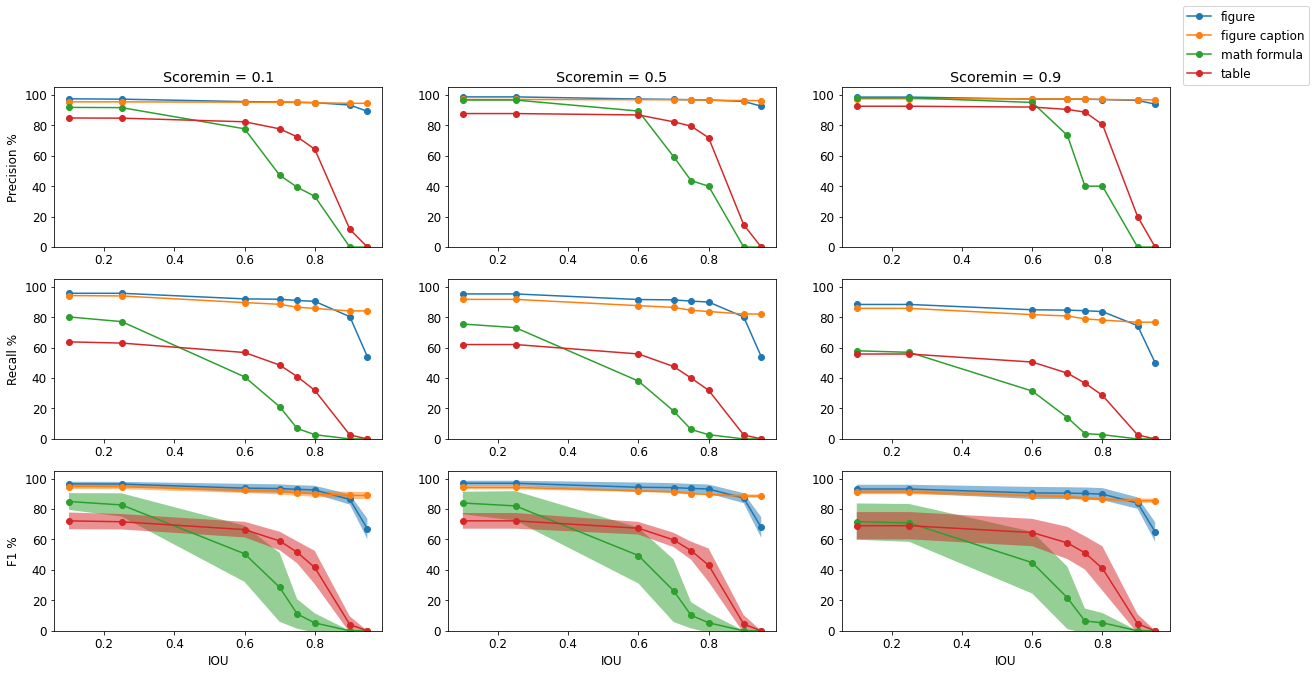

In [47]:
if len(scoreminVec) == 1:
    fig, ax = plt.subplots(3,len(scoreminVec),  figsize=(10,10))
    ax = np.array([ax,ax]).T
else:
    fig, ax = plt.subplots(3,len(scoreminVec),  figsize=(20,10))

ps = []
for i in range(len(scoreminVec)):
    for k in range(len(LABELS)): p1, = ax[0][i].plot(iouminVec,precision[k,i,:],'o-')
    ps.append(p1)
    ax[0][i].set_title('Scoremin = '+str(scoreminVec[i]))
    ax[0][0].set_ylabel('Precision %')
    ax[0][i].set_ylim(0,105)
    
    for k in range(len(LABELS)): ax[1][i].plot(iouminVec,recall[k,i,:], 'o-')
    ax[1][0].set_ylabel('Recall %')
    ax[1][i].set_ylim(0,105)
    
    for k in range(len(LABELS)): 
        ax[2][i].plot(iouminVec,f1[k,i,:], 'o-')
        # include stddev
        ax[2][i].fill_between(iouminVec, f1[k,i,:]-f1_std[k,i,:], f1[k,i,:]+f1_std[k,i,:], alpha=0.5)
    
    ax[2][0].set_ylabel('F1 %')
    ax[2][i].set_ylim(0,105)
        
    ax[-1][i].set_xlabel('IOU')

fig.legend(ps, labels=LABELS)
matplotlib.rcParams.update({'font.size': 12})
plt.show()

Choose a score cut-off.  For the most part, we've found 0.1 to be fine:

In [48]:
scoremin = 0.1 

What IOU cut-offs for each label? for reference:

In [49]:
LABELS

['figure', 'figure caption', 'math formula', 'table']

In [50]:
ioumin_per_label = [0.9, 0.95, 0.8, 0.8] # fig, fig+caption, math formula, table

In [66]:
#Shape is: (# labels, #scores, #ious, #CV folds)
TPs, FPs, FNs, totalTrues = calc_base_metrics_allboxes_cv(LABELS,[scoremin],ioumin_per_label,
                                              truebox3,boxes_sq5,labels_sq5, 
                                              scores_sq5,n_folds_cv=n_folds_cv)
totalTrue = totalTrues.sum(axis=1).astype('int') # collapse onto 1 axis
TP = np.diagonal(TPs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU
FP = np.diagonal(FPs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU
FN = np.diagonal(FNs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU

In [68]:
precisions.shape

(4, 1, 4)

In [69]:
precisions, precision_stds, recalls, \
  recall_stds, f1s, f1_stds = calc_prec_rec_f1_cv(TPs,FPs,FNs,
                                               LABELS,[scoremin],
                                               ioumin_per_label)
precision = np.diagonal(precisions[:,0,:]) 
precision_std = np.diagonal(precision_stds[:,0,:]) 
recall = np.diagonal(recalls[:,0,:]) 
recall_std = np.diagonal(recall_stds[:,0,:]) 
f1 = np.diagonal(f1s[:,0,:]) 
f1_std = np.diagonal(f1_stds[:,0,:]) 

In [70]:
precision.shape

(4,)

In [73]:
print('SCORE = ', scoremin, ' N_CV = ', n_folds_cv)

labelsMetric = ['Metric']
labelsMetric.extend(LABELS)
spacing = '%-15s'
strOut = ' '.join([spacing % (i,) for i in labelsMetric])
print(strOut)

out = ['iou cut']
for i in range(len(LABELS)):
    out.append( str(ioumin_per_label[i]) )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

out = ['# of objs']
for i in range(len(LABELS)):
    out.append( str(totalTrue[i]) )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

print('--------------------------------------------------------------------------------------------')

out = ['TP']
for i in range(len(LABELS)):
    out.append( str(round(TP[i]/totalTrue[i]*100,1))+'%' )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

out = ['FP']
for i in range(len(LABELS)):
    out.append( str(round(FP[i]/totalTrue[i]*100,1))+'%' )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

out = ['FN']
for i in range(len(LABELS)):
    out.append( str(round(FN[i]/totalTrue[i]*100,1))+'%' )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

print('--------------------------------------------------------------------------------------------')
out = ['Precision'] # accuracy of positive predictions => number of true positives out of all of the things we label as positive
for i in range(len(LABELS)):
    #iind = np.where(iouminVec == ioumin_per_label[i])[0]
    #out.append( str(np.round(precision[i,sind,iind][0],1))+'+/-' +str(np.round(precision_std[i,sind,iind][0],1))+ '%' )
    out.append( str(np.round(precision[i],1))+'+/-' +str(np.round(precision_std[i],1))+ '%' )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

out = ['Recall'] # true positive rate => number of true positives over all of the things that SHOULD be positive
for i in range(len(LABELS)):
    #iind = np.where(iouminVec == ioumin_per_label[i])[0]
    out.append( str(np.round(recall[i],1))+'+/-' +str(np.round(recall_std[i],1))+ '%' )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

out = ['F1']
for i in range(len(LABELS)):
    #iind = np.where(iouminVec == ioumin_per_label[i])[0]
    out.append( str(np.round(f1[i],1))+'+/-' +str(np.round(f1_std[i],1))+ '%' )
strOut = ' '.join([spacing % (i,) for i in out])
print(strOut)

SCORE =  0.1  N_CV =  5
Metric          figure          figure caption  math formula    table          
iou cut         0.9             0.95            0.8             0.8            
# of objs       503             468             114             112            
--------------------------------------------------------------------------------------------
TP              80.3%           84.4%           3.5%            32.1%          
FP              5.8%            4.9%            16.7%           17.9%          
FN              19.7%           15.6%           96.5%           67.9%          
--------------------------------------------------------------------------------------------
Precision       93.5+/-1.7%     94.7+/-2.3%     24.3+/-38.8%    66.4+/-17.2%   
Recall          80.1+/-4.0%     84.4+/-2.9%     2.5+/-3.5%      32.1+/-6.5%    
F1              86.2+/-2.4%     89.2+/-2.3%     4.0+/-5.1%      43.1+/-9.4%    
